In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm

from ISLP import load_data

from ISLP.models import (ModelSpec as MS,
                        summarize)

# a)

In [158]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)

x

array([ 3.45584192e-01,  8.21618144e-01,  3.30437076e-01, -1.30315723e+00,
        9.05355867e-01,  4.46374572e-01, -5.36953235e-01,  5.81118104e-01,
        3.64572396e-01,  2.94132497e-01,  2.84222413e-02,  5.46712987e-01,
       -7.36454087e-01, -1.62909948e-01, -4.82119313e-01,  5.98846213e-01,
        3.97221075e-02, -2.92456751e-01, -7.81908462e-01, -2.57192241e-01,
        8.14218052e-03, -2.75602905e-01,  1.29406381e+00,  1.00672432e+00,
       -2.71116248e+00, -1.88901325e+00, -1.74772092e-01, -4.22190412e-01,
        2.13642997e-01,  2.17321931e-01,  2.11783876e+00, -1.11202076e+00,
       -3.77605007e-01,  2.04277161e+00,  6.46702996e-01,  6.63063372e-01,
       -5.14006372e-01, -1.64807517e+00,  1.67464744e-01,  1.09014088e-01,
       -1.22735205e+00, -6.83226662e-01, -7.20436797e-02, -9.44751623e-01,
       -9.82699679e-02,  9.54830275e-02,  3.55862371e-02, -5.06291658e-01,
        5.93748072e-01,  8.91166954e-01,  3.20848305e-01, -8.18230227e-01,
        7.31652284e-01, -

## b)

In [159]:
eps = rng.normal(scale=0.25, size=100)
eps

array([-1.62820253e-01,  2.15611199e-01, -3.13980210e-02,  1.67288310e-01,
        3.04710901e-01,  9.57323957e-02, -2.18930286e-01, -3.78579658e-01,
        4.38346029e-01, -2.78230483e-02, -1.72141237e-01,  3.60642720e-02,
       -4.78528326e-02,  2.13035566e-01,  8.48204561e-03,  3.43739590e-03,
       -1.78644930e-01,  1.17392025e-01, -2.58466681e-01,  1.66472360e-01,
        3.80984378e-01, -3.81171510e-01, -6.16557308e-01,  1.54219689e-01,
        6.36974454e-01, -2.50231212e-01, -3.12673940e-01,  1.47242233e-01,
       -2.10180398e-01, -1.26506371e-01, -8.70293667e-02,  1.33000522e-01,
       -1.01325590e-01,  6.94707100e-02, -4.41333147e-02, -2.11167776e-01,
       -7.99565644e-02, -2.37599916e-01,  1.62874647e-03, -2.80966557e-01,
       -2.73223592e-01,  3.64240454e-01, -1.32960551e-02, -1.34755064e-02,
        1.27884105e-01, -1.05214251e-01, -5.71338419e-02,  1.06287184e-01,
        7.06039606e-02, -2.89824182e-01,  2.08335649e-01, -1.47608736e-01,
       -2.64019738e-01, -

## c)

In [160]:
y = - 1 + 0.5 * x + eps

len(y)

100

The B0 coefficient is - 1.
B1 is 0.5.

## d)

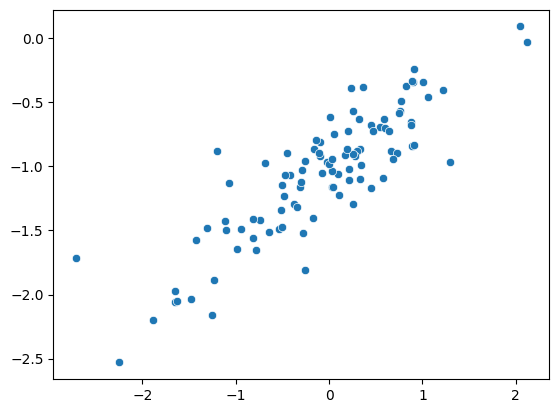

In [161]:
sns.scatterplot(x=x, y=y)
plt.show()

## e)

In [162]:
df = pd.DataFrame({"x": x, "y": y})

X = MS('x').fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

summarize(result)


,coef,std err,t,P>|t|
intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


## f)

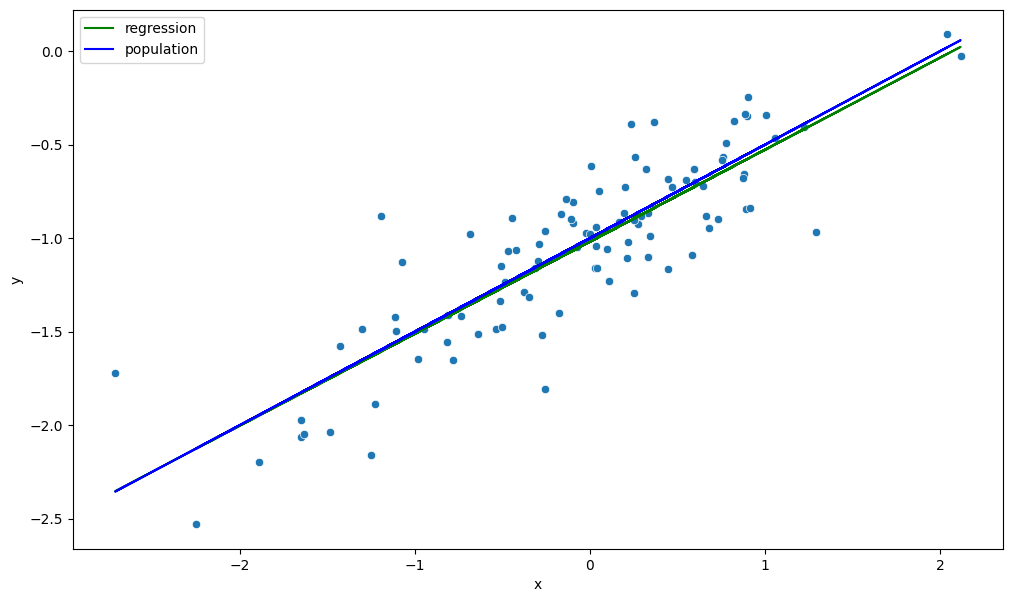

In [163]:
ax = plt.subplots(figsize=(12, 7))[1]
sns.scatterplot(df, x='x', y='y', ax=ax)

reg_y = -1.019 + X['x'] * 0.4921 
pop_y = -1 + X['x'] * .5

reg_plot,  = ax.plot(X['x'], reg_y, color='g')
pop_plot, = ax.plot(X['x'], pop_y, color='b')

plt.legend([reg_plot, pop_plot],['regression','population'])

plt.show()

## g)

In [164]:
# regression of y into x and x^2

df['x^2'] = x ** 2

X = MS(['x', 'x^2']).fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           3.66e-29
Time:                        22:12:54   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0182      0.030    -34.186      0.000      -1.077      -0.959
x              0.4916      0.032     15.562      0.000       0.429       0.554
x^2           -0.0012      0.023     -0.052      0.959      -0.046       0.044
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No, the addition of the x^2 doesn't improve the model fit, this can be seen by the p-value of its coefficient.

## h)

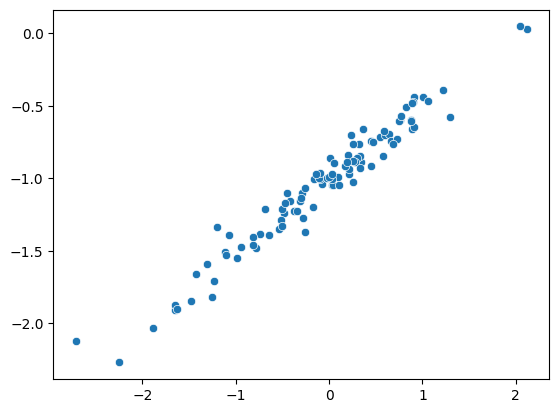

In [165]:
# lowering the error term (eps)
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(scale=0.09, size=100)
y = - 1 + 0.5 * x + eps

sns.scatterplot(x=x, y=y)
plt.show()

In [166]:
df = pd.DataFrame({"x": x, "y": y})

X = MS('x').fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2205.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           5.39e-69
Time:                        22:12:54   Log-Likelihood:                 99.734
No. Observations:                 100   AIC:                            -195.5
Df Residuals:                      98   BIC:                            -190.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0068      0.009   -111.259      0.000      -1.025      -0.989
x              0.4972      0.011     46.958      0.000       0.476       0.518
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

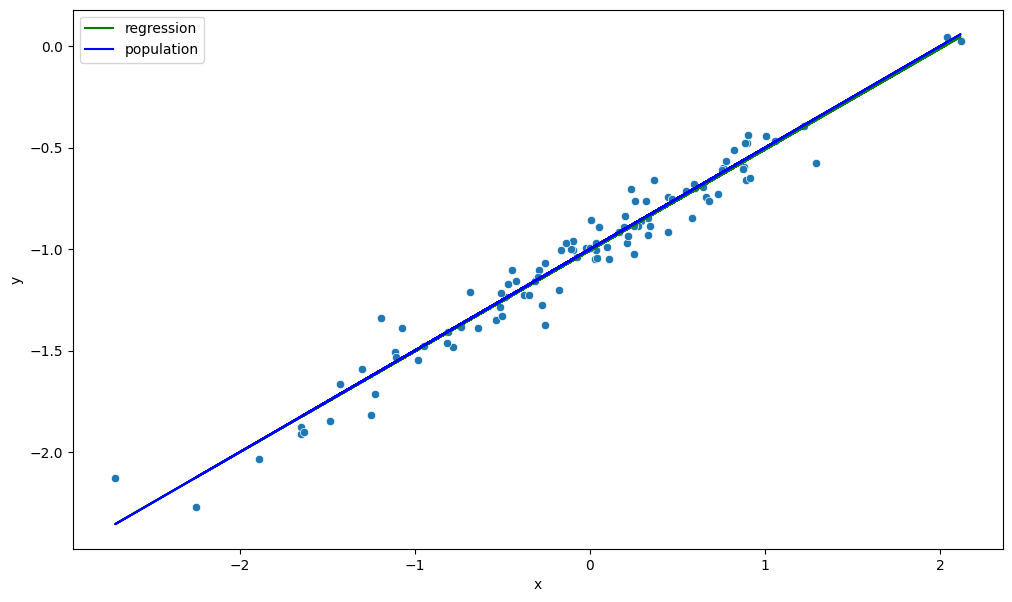

In [167]:
ax = plt.subplots(figsize=(12, 7))[1]
sns.scatterplot(df, x='x', y='y', ax=ax)

reg_y = -1.0068 + X['x'] * 0.4972 
pop_y = -1 + X['x'] * .5

reg_plot,  = ax.plot(X['x'], reg_y, color='g')
pop_plot, = ax.plot(X['x'], pop_y, color='b')

plt.legend([reg_plot, pop_plot],['regression','population'])

plt.show()

## i)

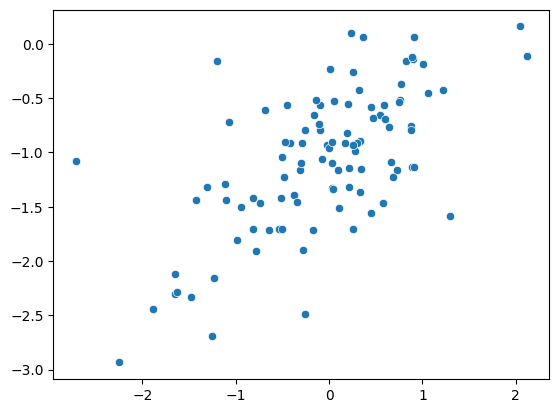

In [171]:
# increasing the error term (eps)
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(scale=0.5, size=100)
y = - 1 + 0.5 * x + eps

sns.scatterplot(x=x, y=y)
plt.show()

In [172]:
df = pd.DataFrame({"x": x, "y": y})

X = MS('x').fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           8.04e-13
Time:                        22:17:00   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0380      0.050    -20.647      0.000      -1.138      -0.938
x              0.4843      0.059      8.233      0.000       0.368       0.601
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

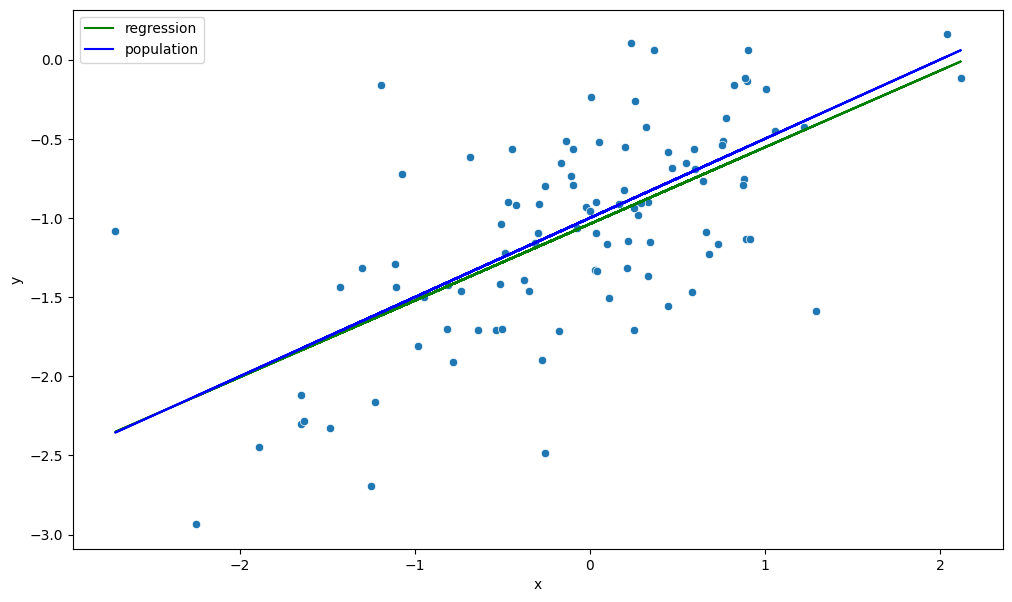

In [174]:
ax = plt.subplots(figsize=(12, 7))[1]
sns.scatterplot(df, x='x', y='y', ax=ax)

reg_y = -1.0380 + X['x'] * 0.4843
pop_y = -1 + X['x'] * .5

reg_plot,  = ax.plot(X['x'], reg_y, color='g')
pop_plot, = ax.plot(X['x'], pop_y, color='b')

plt.legend([reg_plot, pop_plot],['regression','population'])

plt.show()

## j)

We can see that with more noise, more the confidence interval increases its range.